In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

#Data preparing 
data = pd.read_excel("Data_GHGE.xlsx")
# data.columns

In [3]:
X_data = data[[ 'FP index ', 'LP index ', 'Vegetal Pds-FS',
       'Cereals -FS', 'Starchy Rts-FS', 'Pulses-FS', 'Fruits -FS', 'Meat-FS',
       'Fish-FS', 'Sugar & Swt-FS', 'Oils-FS ', 'Vegetables-FS ', 'Spices-FS',
       'Eggs-FS', 'Milk-FS', 'Cereals-LSF', 'Starchy Rts-LSF', 'Pulses-LSF',
       'Meat-LSF', 'Fish-LSF', 'Cereals-LS', 'Starchy-LS', 'Fruits-LS',
       'Energy use', 'Renewable energy ']]
Y_data = data[['GHGEs ', 'AG land ',
       'Agricultural water share ', 'Surface temp.', 'Overweight', 'Obese',
       'Death-NCD ', 'Life expectancy ']] 

In [4]:
Env_data = [X_data,Y_data[(['GHGEs ', 'AG land ',
       'Agricultural water share ', 'Surface temp.'])]]

Health_data = [X_data,Y_data[(['Overweight', 'Obese','Death-NCD ', 'Life expectancy '])]]



Environ_data = pd.concat(Env_data, axis =1)
Healthimp_data = pd.concat(Health_data, axis =1)

In [5]:

from sklearn.preprocessing import StandardScaler
X_data=Healthimp_data[[ 'FP index ', 'LP index ', 'Vegetal Pds-FS',
       'Cereals -FS', 'Starchy Rts-FS', 'Pulses-FS', 'Fruits -FS', 'Meat-FS',
       'Fish-FS', 'Sugar & Swt-FS', 'Oils-FS ', 'Vegetables-FS ', 'Spices-FS',
       'Eggs-FS', 'Milk-FS', 'Cereals-LSF', 'Starchy Rts-LSF', 'Pulses-LSF',
       'Meat-LSF', 'Fish-LSF', 'Cereals-LS', 'Starchy-LS', 'Fruits-LS',
       'Energy use', 'Renewable energy ' ]]
Y_data = Healthimp_data[['Overweight', 'Obese','Death-NCD ', 'Life expectancy ']]

scaler = StandardScaler(copy=False)
scaler.fit(X_data)
XX = scaler.transform(X_data) 

X_x = pd.DataFrame(XX, columns = ['FP index ', 'LP index ', 'Vegetal Pds-FS',
       'Cereals -FS', 'Starchy Rts-FS', 'Pulses-FS', 'Fruits -FS', 'Meat-FS',
       'Fish-FS', 'Sugar & Swt-FS', 'Oils-FS ', 'Vegetables-FS ', 'Spices-FS',
       'Eggs-FS', 'Milk-FS', 'Cereals-LSF', 'Starchy Rts-LSF', 'Pulses-LSF',
       'Meat-LSF', 'Fish-LSF', 'Cereals-LS', 'Starchy-LS', 'Fruits-LS',
       'Energy use', 'Renewable energy '], dtype = float )

x_train = X_x[:52]
x_test = X_x[52:]
y_train = Y_data[:52]
y_test = Y_data[52:] 
#x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data,test_size=0.25,random_state=0)

In [6]:
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error

from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from pyGRNN import GRNN
model = GRNN()

# Adboost prediction


In [7]:
# Health impact prediction

AdaBoost_reg = MultiOutputRegressor(AdaBoostRegressor(n_estimators= 50,loss='linear',learning_rate= 0.1, random_state=123)).fit(x_train, y_train)
AdaBoost_outputHE=AdaBoost_reg.predict(x_test)
AdaBoost_outputHE
# pd.DataFrame(AdaBoost_outputHE[:,3]).to_csv('AdaBoost_life expectancy.csv')
# Statistical validation
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,AdaBoost_outputHE))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,AdaBoost_outputHE)))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,AdaBoost_outputHE)))
residual_He = np.abs(y_test-AdaBoost_outputHE)
R2 = 1 - (residual_He/np.sum(np.sqrt(residual_He)))
R2 = np.average(R2)
print('KNN  R2:' , R2)

MAE :   3.2412290891098614
RMSE :   4.06249976997628
RMAE :   1.8003413812690807
KNN  R2: 0.807588991326435


([<matplotlib.axis.XTick at 0x20e779f5340>,
 [Text(0, 0, '1961'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010'),
  Text(61, 0, '2021')])

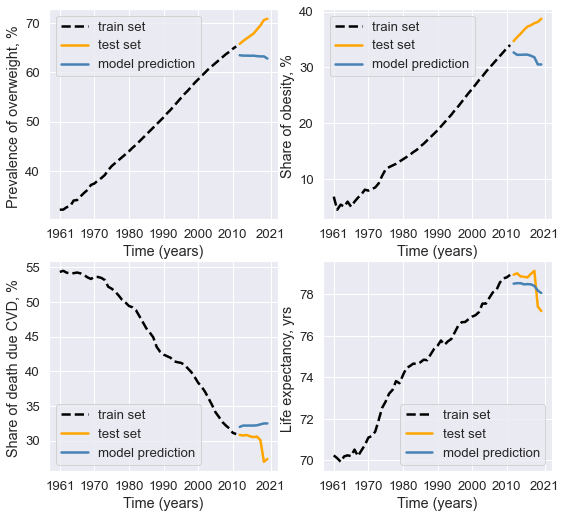

In [8]:
fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(y_train['Overweight'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Overweight'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,AdaBoost_outputHE[:,0],'-', color='steelblue', markersize=12, linewidth=2.5)
plt.xlabel('Time (years)')
plt.ylabel('Prevalence of overweight, % ')
plt.legend(['train set', 'test set','model prediction' ])

x = [ 0, 10,20,30,40,50,61]
labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


plt.subplot(2, 2, 2)
plt.plot(y_train['Obese'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Obese'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,AdaBoost_outputHE[:,1],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of obesity, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')
# x = [ 0, 2,4,6,9]
# labels = [ 2021, 2023,  2025,2027,  2030]
# plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])


plt.subplot(2, 2, 3)
plt.plot(y_train['Death-NCD '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Death-NCD '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,AdaBoost_outputHE[:,2],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of death due CVD, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction' ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')

plt.subplot(2, 2, 4)
plt.plot(y_train['Life expectancy '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Life expectancy '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,AdaBoost_outputHE[:,3],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Life expectancy, yrs ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])

# fig.tight_layout()

Environmental impact prediction

In [9]:
YY_data = Environ_data[['GHGEs ', 
       'Agricultural water share ', 'Surface temp.']]

# scaler = StandardScaler(copy=False)
# scaler.fit(X_data)
# scaler.transform(X_data) 

# x_train = X_data[:52]
# # x_test = X_data[52:]
yy_train = YY_data[:52]
yy_test = YY_data[52:]


AdaBoost_reg = MultiOutputRegressor(AdaBoostRegressor(n_estimators= 50,loss='linear',
                                                      learning_rate= 0.1, random_state=123)).fit(x_train, yy_train)
AdaBoost_output_Env=AdaBoost_reg.predict(x_test)
# pd.DataFrame(AdaBoost_output_Env)
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,AdaBoost_output_Env))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,AdaBoost_output_Env)))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(yy_test,AdaBoost_output_Env)))
residual_En = np.abs(yy_test-AdaBoost_output_Env)
R2 = 1 - (residual_En/np.sum(np.sqrt(residual_En)))
R2= np.average(R2)
print('R2:', R2)

MAE :   2.2765164355599787
RMSE :   3.0267889705619946
RMAE :   1.5088129226514395
R2: 0.8374033735332793


([<matplotlib.axis.XTick at 0x20e77b95490>,
 [Text(0, 0, '1961'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010'),
  Text(61, 0, '2021')])

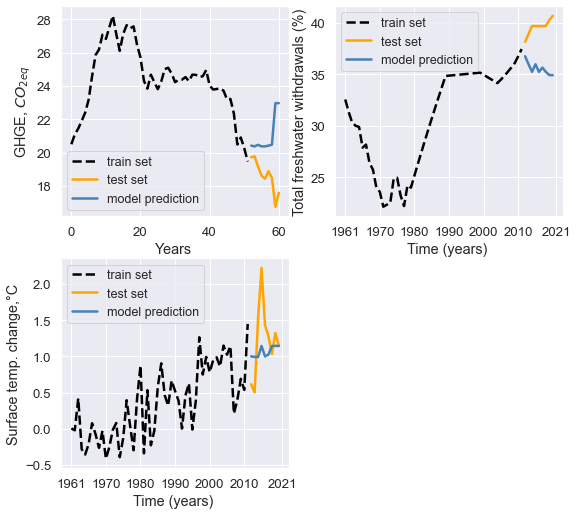

In [10]:
fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(yy_train.index, yy_train['GHGEs '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['GHGEs '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,AdaBoost_output_Env[:,0],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Years ')
plt.ylabel(r'GHGE, $CO_{2eq}$')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction' ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]


plt.subplot(2, 2, 2)
plt.plot(yy_train.index, yy_train['Agricultural water share '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Agricultural water share '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,AdaBoost_output_Env[:,1],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Total freshwater withdrawals (%)')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction' ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')
# x = [ 0, 2,4,6,9]
# labels = [ 2021, 2023,  2025,2027,  2030]
# plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])


plt.subplot(2, 2, 3)
plt.plot(yy_train.index, yy_train['Surface temp.'],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Surface temp.'],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,AdaBoost_output_Env[:,2],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Surface temp. change,\N{DEGREE SIGN}C')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


# plt.subplot(2, 2, 4)
# plt.plot(y_train['Life expectancy '],'--', color='black',markersize=12, linewidth=2.5)
# plt.plot(y_test['Life expectancy '],'-',color='orange',markersize=12, linewidth=2.5)
# plt.plot(y_test.index,AdaBoost_outputHE[:,3],'-', color='steelblue', markersize=12, linewidth=2.5)
# # plt.title('Measured against model data')
# plt.xlabel('Time (years)')
# plt.ylabel('Life expectancy, yrs ')
# # plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# # plt.ylim(70, 80)
# plt.legend(['train set', 'test set','model prediction'  ])

# x = [ 0, 10,20,30,40,50,61]

# labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
# plt.xticks(x, labels, rotation='horizontal')
# # # plt.legend(['BAU','LT Strategies'  ])

# # fig.tight_layout()

# GRNN

Health impact prediction 

In [11]:
GRNN_reg= MultiOutputRegressor(GRNN(kernel="RBF",sigma= 0.9156, n_restarts_optimizer= 5,                                  
                                    calibration = 'None', seed=42 )).fit(x_train, y_train)
GRNN_outputHE=GRNN_reg.predict(x_test)

from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,GRNN_outputHE))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,GRNN_outputHE)))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,GRNN_outputHE)))
residual_He = np.abs(y_test-GRNN_outputHE)
R2 = 1 - (residual_He/np.sum(np.sqrt(residual_He)))
R2= np.average(R2)
print('R2:' , R2)

MAE :   2.095663212991624
RMSE :   3.016540748220705
RMAE :   1.4476405676104909
R2: 0.8315945047498841


([<matplotlib.axis.XTick at 0x20e77fef850>,
 [Text(0, 0, '1961'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010'),
  Text(61, 0, '2021')])

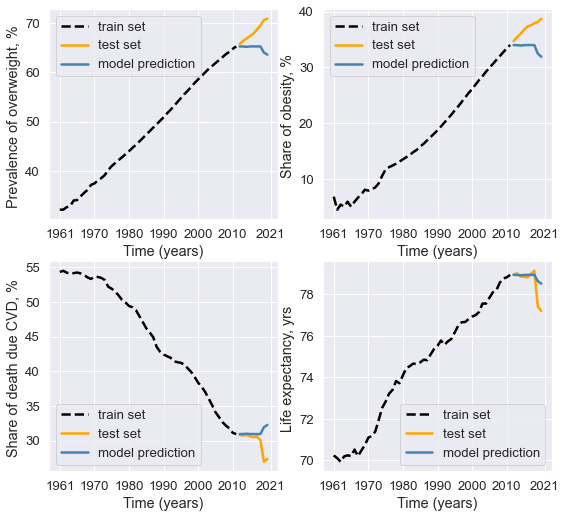

In [12]:
# Ploting of Health impact 
fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(y_train['Overweight'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Overweight'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,GRNN_outputHE[:,0],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Prevalence of overweight, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


plt.subplot(2, 2, 2)
plt.plot(y_train['Obese'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Obese'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,GRNN_outputHE[:,1],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of obesity, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')
# x = [ 0, 2,4,6,9]
# labels = [ 2021, 2023,  2025,2027,  2030]
# plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])


plt.subplot(2, 2, 3)
plt.plot(y_train['Death-NCD '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Death-NCD '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,GRNN_outputHE[:,2],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of death due CVD, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')





plt.subplot(2, 2, 4)
plt.plot(y_train['Life expectancy '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Life expectancy '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,GRNN_outputHE[:,3],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Life expectancy, yrs ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])

# fig.tight_layout()


Environmental impact prediction

In [13]:
# Environmental impact prediction
YY_data = Environ_data[['GHGEs ', 
       'Agricultural water share ', 'Surface temp.']]

 
yy_train = YY_data[:52]
yy_test = YY_data[52:]

from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor


# GRNN = algorithms.GRNN(std = 1 , verbose = False)
GRNN_reg_EN= MultiOutputRegressor(GRNN(kernel="RBF",sigma= 0.9156, n_restarts_optimizer= 5,                                  
                                    calibration = 'None', seed=42 )).fit(x_train,yy_train)
GRNN_outputEN=GRNN_reg_EN.predict(x_test)


([<matplotlib.axis.XTick at 0x20e78253130>,
 [Text(0, 0, '1961'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010'),
  Text(61, 0, '2021')])

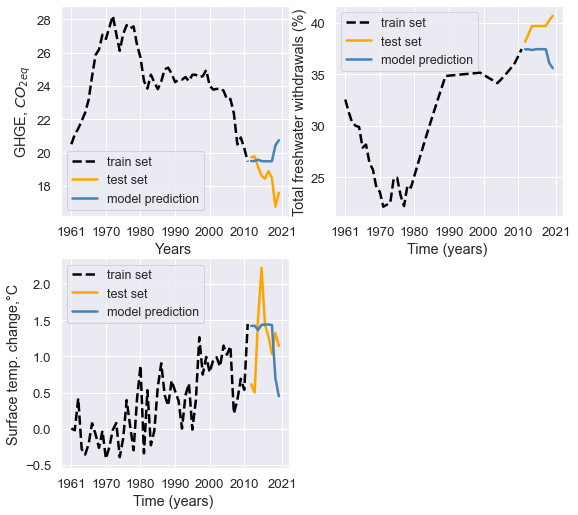

In [14]:
# Ploting of environmental impact 

fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(yy_train.index, yy_train['GHGEs '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['GHGEs '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,GRNN_outputEN[:,0],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Years ')
plt.ylabel(r'GHGE, $CO_{2eq}$')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


plt.subplot(2, 2, 2)
plt.plot(yy_train.index, yy_train['Agricultural water share '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Agricultural water share '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,GRNN_outputEN[:,1],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Total freshwater withdrawals (%)')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')
# x = [ 0, 2,4,6,9]
# labels = [ 2021, 2023,  2025,2027,  2030]
# plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])


plt.subplot(2, 2, 3)
plt.plot(yy_train.index, yy_train['Surface temp.'],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Surface temp.'],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,GRNN_outputEN[:,2],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Surface temp. change,\N{DEGREE SIGN}C')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')



# KNN Model 

Health impact prediction

In [15]:

KNN_reg = KNeighborsRegressor( n_neighbors=2,weights='uniform',algorithm='auto',leaf_size=10,p=2,metric='minkowski',).fit(x_train, y_train)
KNN_output=KNN_reg .predict(x_test)

from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,KNN_output))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,KNN_output)))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,KNN_output)))

residual_He = np.abs(y_test-KNN_output)
R2 = 1 - (residual_He/np.sum(np.sqrt(residual_He)))
R2 = np.average(R2)

print('KNN  R2:' , R2)

MAE :   2.2679207023594197
RMSE :   3.1859470895782587
RMAE :   1.5059617200843518
KNN  R2: 0.8277973948269035


([<matplotlib.axis.XTick at 0x20e7882b850>,
 [Text(0, 0, '1961'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010'),
  Text(61, 0, '2021')])

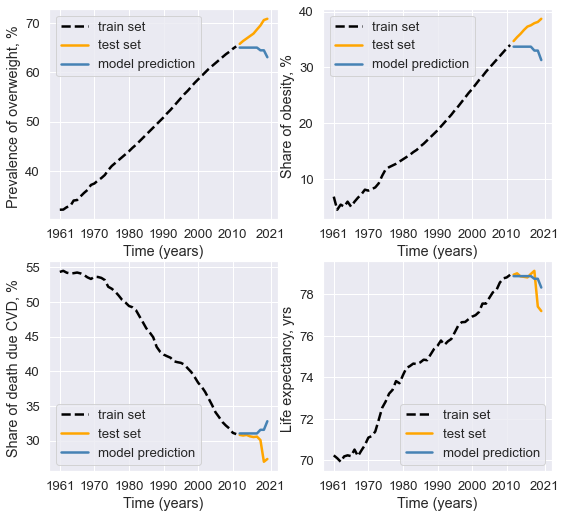

In [16]:
# Ploting of Health impact 
fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(y_train['Overweight'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Overweight'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,KNN_output[:,0],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Prevalence of overweight, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


plt.subplot(2, 2, 2)
plt.plot(y_train['Obese'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Obese'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,KNN_output[:,1],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of obesity, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')
# x = [ 0, 2,4,6,9]
# labels = [ 2021, 2023,  2025,2027,  2030]
# plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])


plt.subplot(2, 2, 3)
plt.plot(y_train['Death-NCD '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Death-NCD '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,KNN_output[:,2],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of death due CVD, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')





plt.subplot(2, 2, 4)
plt.plot(y_train['Life expectancy '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Life expectancy '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,KNN_output[:,3],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Life expectancy, yrs ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])

# fig.tight_layout()


Environmental impact prediction

In [17]:
yy_train = YY_data[:52]
yy_test = YY_data[52:]


# x_train,x_test,yy_train,yy_test = train_test_split(X_data,YY_data,test_size=0.25)


KNN_reg = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=2,weights='uniform',algorithm='auto',leaf_size=10,p=2,metric='minkowski')).fit(x_train, yy_train)
KNN_output_Env=KNN_reg.predict(x_test)
# pd.DataFrame(KNN_output_Env)


([<matplotlib.axis.XTick at 0x20e78962a60>,
 [Text(0, 0, '1961'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010'),
  Text(61, 0, '2021')])

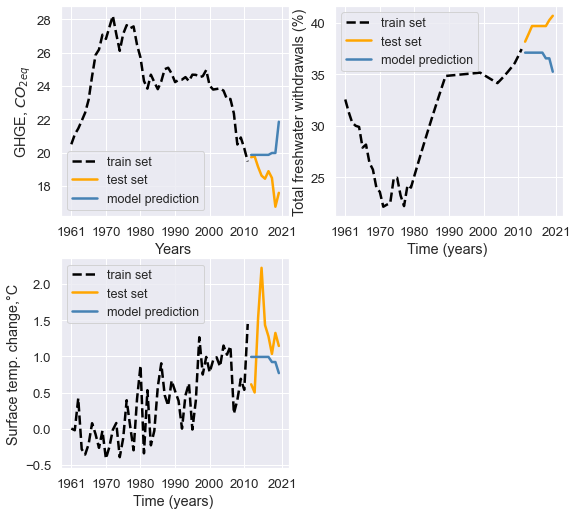

In [18]:
# Ploting of environmental impact 

fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(yy_train.index, yy_train['GHGEs '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['GHGEs '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,KNN_output_Env[:,0],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Years ')
plt.ylabel(r'GHGE, $CO_{2eq}$')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


plt.subplot(2, 2, 2)
plt.plot(yy_train.index, yy_train['Agricultural water share '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Agricultural water share '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,KNN_output_Env[:,1],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Total freshwater withdrawals (%)')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')
# x = [ 0, 2,4,6,9]
# labels = [ 2021, 2023,  2025,2027,  2030]
# plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])


plt.subplot(2, 2, 3)
plt.plot(yy_train.index, yy_train['Surface temp.'],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Surface temp.'],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,KNN_output_Env[:,2],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Surface temp. change,\N{DEGREE SIGN}C')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')



# LASSO REGRESSION

In [19]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LogisticRegression, LinearRegression


#LASSO REGRESSION
Lasso_reg = MultiOutputRegressor(Lasso(max_iter=1500, alpha= 0.63, tol = 10, fit_intercept=True)).fit(x_train, y_train)

Lasso_outputHE=Lasso_reg.predict(x_test)
Lasso_outputHE

from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,Lasso_outputHE))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,Lasso_outputHE)))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,Lasso_outputHE)))
residual_He = np.abs(y_test-Lasso_outputHE)
R2 = 1 - (residual_He/np.sum(np.sqrt(residual_He)))
R2 = np.average(R2)

print('KNN  R2:' , R2)

MAE :   1.252011737944708
RMSE :   1.6160894801036885
RMAE :   1.1189333036176499
KNN  R2: 0.8670457505676133


([<matplotlib.axis.XTick at 0x20e78c84b50>,
 [Text(0, 0, '1961'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010'),
  Text(61, 0, '2021')])

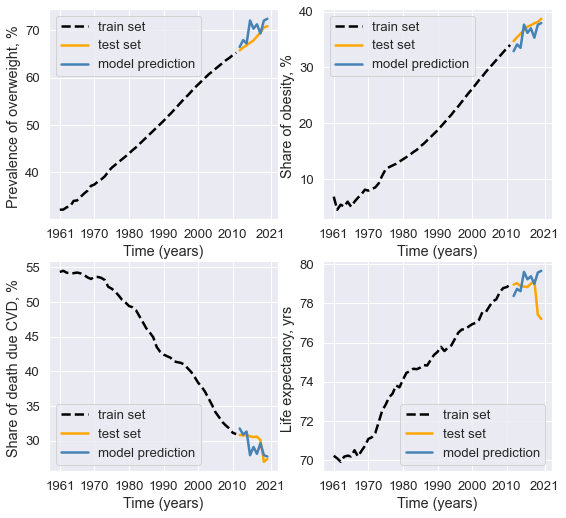

In [20]:
# Ploting of Health impact 
fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(y_train['Overweight'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Overweight'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,Lasso_outputHE[:,0],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Prevalence of overweight, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')



plt.subplot(2, 2, 2)
plt.plot(y_train['Obese'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Obese'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,Lasso_outputHE[:,1],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of obesity, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')
# x = [ 0, 2,4,6,9]
# labels = [ 2021, 2023,  2025,2027,  2030]
# plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])


plt.subplot(2, 2, 3)
plt.plot(y_train['Death-NCD '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Death-NCD '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,Lasso_outputHE[:,2],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of death due CVD, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')




plt.subplot(2, 2, 4)
plt.plot(y_train['Life expectancy '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Life expectancy '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,Lasso_outputHE[:,3],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Life expectancy, yrs ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


# fig.tight_layout()


Environmental impact prediction

In [21]:
Lasso_reg = MultiOutputRegressor(Lasso(max_iter=1500, alpha= 0.63, tol = 10, fit_intercept=True)).fit(x_train, yy_train)
Lasso_output_Env=Lasso_reg.predict(x_test)
pd.DataFrame(Lasso_output_Env)

,0,1,2
0,22.027446,37.295699,0.345442
1,22.465496,36.996612,0.345442
2,22.370983,37.334506,0.345442
3,22.375747,39.251363,0.345442
4,22.402482,39.013630,0.345442
5,21.780540,39.756429,0.345442
6,22.039700,38.893525,0.345442
7,22.939774,40.349648,0.345442
8,23.052715,40.929194,0.345442


([<matplotlib.axis.XTick at 0x20e78f43760>,
 [Text(0, 0, '1961'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010'),
  Text(61, 0, '2021')])

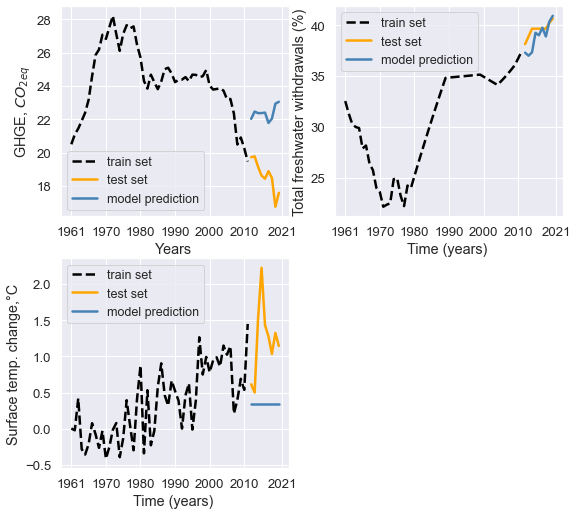

In [22]:
# Ploting of environmental impact 

fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(yy_train.index, yy_train['GHGEs '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['GHGEs '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,Lasso_output_Env[:,0],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Years ')
plt.ylabel(r'GHGE, $CO_{2eq}$')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')



plt.subplot(2, 2, 2)
plt.plot(yy_train.index, yy_train['Agricultural water share '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Agricultural water share '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,Lasso_output_Env[:,1],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Total freshwater withdrawals (%)')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')
# x = [ 0, 2,4,6,9]
# labels = [ 2021, 2023,  2025,2027,  2030]
# plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])


plt.subplot(2, 2, 3)
plt.plot(yy_train.index, yy_train['Surface temp.'],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Surface temp.'],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,Lasso_output_Env[:,2],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Surface temp. change,\N{DEGREE SIGN}C')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


# MLP Regressor 

In [23]:
from sklearn.neural_network import MLPRegressor
MLP_reg = MultiOutputRegressor( MLPRegressor(activation= 'logistic', 
                                         alpha= 0.0002, beta_1= 0.9, beta_2= 0.999, 
                                         learning_rate_init= 3,
max_iter= 200,solver='lbfgs')).fit(x_train, y_train)
MLP_outputHE=MLP_reg.predict(x_test)
MLP_outputHE

from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,MLP_outputHE))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,MLP_outputHE)))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,MLP_outputHE)))
residual_He = np.abs(y_test-MLP_outputHE)
R2 = 1 - (residual_He/np.sum(np.sqrt(residual_He)))
R2 = np.average(R2)
print('KNN  R2:', R2)

MAE :   2.0986384711784383
RMSE :   2.9266320572196776
RMAE :   1.4486678263765087
KNN  R2: 0.8316885193282293


([<matplotlib.axis.XTick at 0x20e7923d7f0>,
 [Text(0, 0, '1961'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010'),
  Text(61, 0, '2021')])

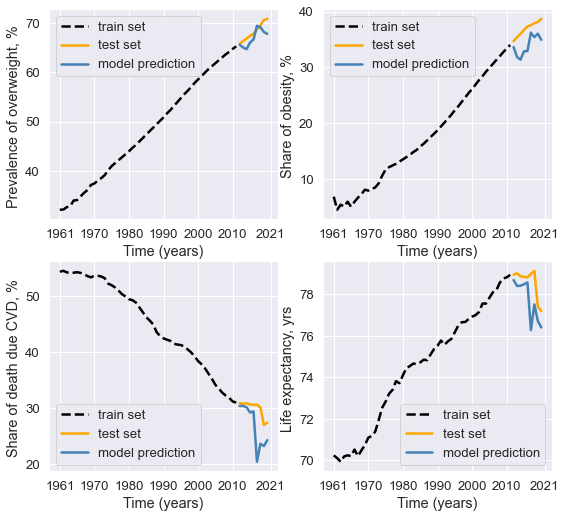

In [24]:
# Ploting of Health impact 
fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(y_train['Overweight'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Overweight'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,MLP_outputHE[:,0],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Prevalence of overweight, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


plt.subplot(2, 2, 2)
plt.plot(y_train['Obese'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Obese'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,MLP_outputHE[:,1],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of obesity, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')
# x = [ 0, 2,4,6,9]
# labels = [ 2021, 2023,  2025,2027,  2030]
# plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])


plt.subplot(2, 2, 3)
plt.plot(y_train['Death-NCD '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Death-NCD '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,MLP_outputHE[:,2],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of death due CVD, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')



plt.subplot(2, 2, 4)
plt.plot(y_train['Life expectancy '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Life expectancy '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,MLP_outputHE[:,3],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Life expectancy, yrs ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


# fig.tight_layout()


In [25]:
MLP_reg = MultiOutputRegressor( MLPRegressor(activation= 'logistic', 
                                         alpha= 0.0002, beta_1= 0.9, beta_2= 0.999, 
                                         learning_rate_init= 3,
max_iter= 200,solver='lbfgs')).fit(x_train, yy_train)
MLP_output_Env=MLP_reg.predict(x_test)

([<matplotlib.axis.XTick at 0x20e7a420610>,
 [Text(0, 0, '1961'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010'),
  Text(61, 0, '2021')])

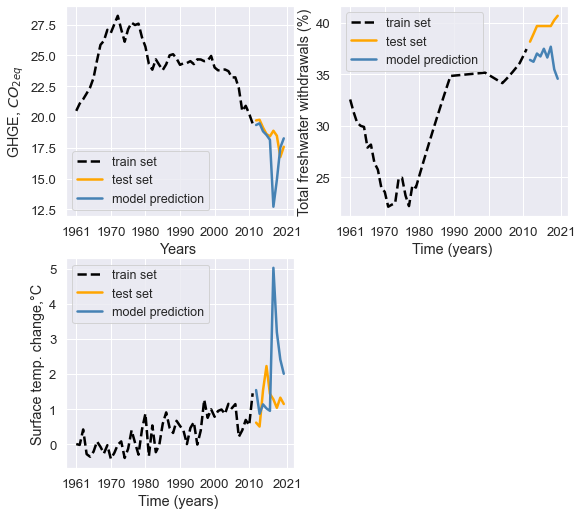

In [26]:
# Ploting of environmental impact 

fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(yy_train.index, yy_train['GHGEs '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['GHGEs '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,MLP_output_Env[:,0],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Years ')
plt.ylabel(r'GHGE, $CO_{2eq}$')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


plt.subplot(2, 2, 2)
plt.plot(yy_train.index, yy_train['Agricultural water share '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Agricultural water share '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,MLP_output_Env[:,1],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Total freshwater withdrawals (%)')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')
# x = [ 0, 2,4,6,9]
# labels = [ 2021, 2023,  2025,2027,  2030]
# plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])


plt.subplot(2, 2, 3)
plt.plot(yy_train.index, yy_train['Surface temp.'],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Surface temp.'],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,MLP_output_Env[:,2],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Surface temp. change,\N{DEGREE SIGN}C')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


# Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = MultiOutputRegressor(RandomForestRegressor(ccp_alpha= 0.001, max_depth= 3, 
                                                    n_estimators=200)).fit(x_train, y_train)
RF_outputHE=RF_reg.predict(x_test)

RF_outputHE

from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,RF_outputHE))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,RF_outputHE)))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,RF_outputHE)))
residual_He = np.abs(y_test-RF_outputHE)
R2 = 1 - (residual_He/np.sum(np.sqrt(residual_He)))
R2 = np.average(R2)
print('R2:' , R2)


MAE :   3.6398186299854456
RMSE :   4.435353066316457
RMAE :   1.9078308703827616
R2: 0.7962098766189077


([<matplotlib.axis.XTick at 0x20e7a5b4d90>,
 [Text(0, 0, '1961'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010'),
  Text(61, 0, '2021')])

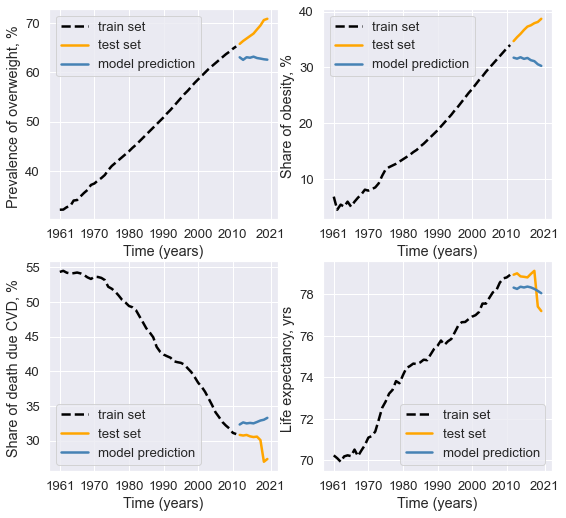

In [28]:
# Ploting of Health impact 
fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(y_train['Overweight'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Overweight'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,RF_outputHE[:,0],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Prevalence of overweight, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


plt.subplot(2, 2, 2)
plt.plot(y_train['Obese'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Obese'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,RF_outputHE[:,1],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of obesity, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')


plt.subplot(2, 2, 3)
plt.plot(y_train['Death-NCD '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Death-NCD '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,RF_outputHE[:,2],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of death due CVD, % ')
# plt.legend(['Share of life Expectancy','RF Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')



plt.subplot(2, 2, 4)
plt.plot(y_train['Life expectancy '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Life expectancy '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,RF_outputHE[:,3],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Life expectancy, yrs ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


# fig.tight_layout()


In [29]:
RF_reg = MultiOutputRegressor(RandomForestRegressor()).fit(x_train, yy_train)
RF_output_Env=RF_reg.predict(x_test)

([<matplotlib.axis.XTick at 0x20e7a84dd30>,
 [Text(0, 0, '1961'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010'),
  Text(61, 0, '2021')])

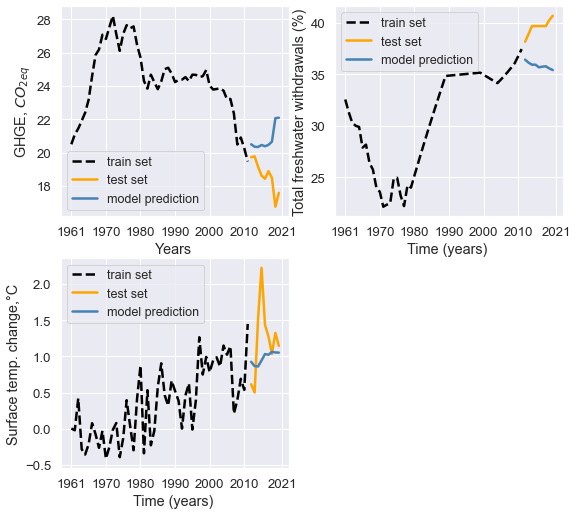

In [30]:
# Ploting of environmental impact 

fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(yy_train.index, yy_train['GHGEs '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['GHGEs '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,RF_output_Env[:,0],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Years ')
plt.ylabel(r'GHGE, $CO_{2eq}$')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


plt.subplot(2, 2, 2)
plt.plot(yy_train.index, yy_train['Agricultural water share '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Agricultural water share '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,RF_output_Env[:,1],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Total freshwater withdrawals (%)')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')
# x = [ 0, 2,4,6,9]
# labels = [ 2021, 2023,  2025,2027,  2030]
# plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])


plt.subplot(2, 2, 3)
plt.plot(yy_train.index, yy_train['Surface temp.'],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Surface temp.'],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,RF_output_Env[:,2],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Surface temp. change,\N{DEGREE SIGN}C')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


# RIDGE Model

In [32]:
from sklearn.linear_model import Ridge
Ridge_reg = MultiOutputRegressor(Ridge( alpha=0.5,tol=0.2, solver="sag", max_iter= 1000, random_state=0)).fit(x_train, y_train)
Ridge_reg_outputHE=Ridge_reg.predict(x_test)
# Ridge_reg_outputHE

from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,Ridge_reg_outputHE))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,Ridge_reg_outputHE)))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,Ridge_reg_outputHE)))

residual_He = np.abs(y_test-Ridge_reg_outputHE)
R2 = 1 - (residual_He/np.sum(np.sqrt(residual_He)))
R2 = np.average(R2)
print('R2:' ,R2)

MAE :   1.9531819718288617
RMSE :   2.596303162485998
RMAE :   1.397562868649873
R2: 0.8334523466395864


([<matplotlib.axis.XTick at 0x20e7ab4a5e0>,
 [Text(0, 0, '1961'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010'),
  Text(61, 0, '2021')])

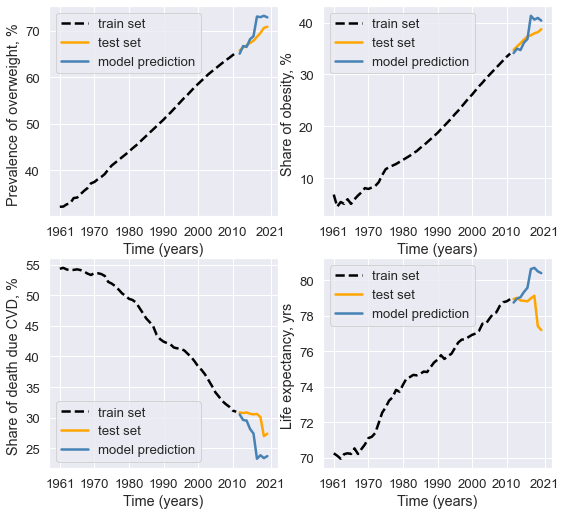

In [33]:
# Ploting of Health impact 
fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(y_train['Overweight'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Overweight'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,Ridge_reg_outputHE[:,0],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Prevalence of overweight, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')

plt.subplot(2, 2, 2)
plt.plot(y_train['Obese'],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Obese'],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,Ridge_reg_outputHE[:,1],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of obesity, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')


plt.subplot(2, 2, 3)
plt.plot(y_train['Death-NCD '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Death-NCD '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,Ridge_reg_outputHE[:,2],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Share of death due CVD, % ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')



plt.subplot(2, 2, 4)
plt.plot(y_train['Life expectancy '],'--', color='black',markersize=12, linewidth=2.5)
plt.plot(y_test['Life expectancy '],'-',color='orange',markersize=12, linewidth=2.5)
plt.plot(y_test.index,Ridge_reg_outputHE[:,3],'-', color='steelblue', markersize=12, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years)')
plt.ylabel('Life expectancy, yrs ')
# plt.legend(['Share of life Expectancy','Lasso Model prediction ' ])
# plt.ylim(70, 80)
plt.legend(['train set', 'test set','model prediction'  ])

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


# fig.tight_layout()


In [35]:
Ridge_reg = MultiOutputRegressor(Ridge( alpha=0.2,tol=0.01, solver="saga", max_iter= 1500)).fit(x_train, yy_train)
Ridge_reg_output_Env=Ridge_reg.predict(x_test)
pd.DataFrame(Ridge_reg_output_Env)


print('MAE :'," ", metrics.mean_absolute_error(yy_test,Ridge_reg_output_Env))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,Ridge_reg_output_Env)))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(yy_test,Ridge_reg_output_Env)))

residual_En = np.abs(yy_test-Ridge_reg_output_Env)
R2 = 1 - (residual_En/np.sum(np.sqrt(residual_En)))
r2= np.average(R2)
print('R2:' , r2)

MAE :   0.9121412131209231
RMSE :   1.1307415028792345
RMAE :   0.9550608426277999
KNN  R2: 0.8881669513576456


In [ ]:
# Ploting of environmental impact 

fig = plt.figure(figsize=(9,8.5))
# plt.style.use('seaborn')
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
sns.set(font_scale=1.2)

plt.subplot(2, 2, 1)
plt.plot(yy_train.index, yy_train['GHGEs '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['GHGEs '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,Ridge_reg_output_Env[:,0],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Years ')
plt.ylabel(r'GHGE, $CO_{2eq}$')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')


plt.subplot(2, 2, 2)
plt.plot(yy_train.index, yy_train['Agricultural water share '],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Agricultural water share '],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,Ridge_reg_output_Env[:,1],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Total freshwater withdrawals (%)')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
# plt.ylabel('Number of obese adults, millions')
# x = [ 0, 2,4,6,9]
# labels = [ 2021, 2023,  2025,2027,  2030]
# plt.xticks(x, labels, rotation='horizontal')
# # plt.legend(['BAU','LT Strategies'  ])


plt.subplot(2, 2, 3)
plt.plot(yy_train.index, yy_train['Surface temp.'],'--',color='black', markersize=11, linewidth=2.5)
plt.plot(yy_test.index, yy_test['Surface temp.'],'-',color='orange', markersize=11, linewidth=2.5)
plt.plot(yy_test.index,Ridge_reg_output_Env[:,2],'-',color='steelblue', markersize=11, linewidth=2.5)
# plt.title('Measured against model data')
plt.xlabel('Time (years) ')
plt.ylabel('Surface temp. change,\N{DEGREE SIGN}C')
# plt.ylim(5.5, 7)
plt.legend(['train set','test set','model prediction'  ],fontsize= 12.5)

x = [ 0, 10,20,30,40,50,61]

labels = [1961, 1970, 1980, 1990, 2000,2010, 2021]
plt.xticks(x, labels, rotation='horizontal')
